In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('mushroom_cleaned.csv')
print(data.head())
print(data.tail())

   cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
0          1372          2                2          10     3.807467   
1          1461          2                2          10     3.807467   
2          1371          2                2          10     3.612496   
3          1261          6                2          10     3.787572   
4          1305          6                2          10     3.711971   

   stem-width  stem-color    season  class  
0        1545          11  1.804273      1  
1        1557          11  1.804273      1  
2        1566          11  1.804273      1  
3        1566          11  1.804273      1  
4        1464          11  0.943195      1  
       cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
53727            73          5                3           2     0.887740   
53728            82          2                3           2     1.186164   
53729            82          5                3           2     0.915

In [ ]:
data.shape

(53732, 9)

In [ ]:
data.columns

Index(['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season', 'class'],
      dtype='object')

In [ ]:
data.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [ ]:
data.isnull()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
54030,False,False,False,False,False,False,False,False,False
54031,False,False,False,False,False,False,False,False,False
54032,False,False,False,False,False,False,False,False,False
54033,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

,0
cap-diameter,0
cap-shape,0
gill-attachment,0
gill-color,0
stem-height,0
stem-width,0
stem-color,0
season,0
class,0


In [ ]:
data[data.duplicated()]
print(data.duplicated().sum())

303


In [ ]:
df_no_duplicates = data.drop_duplicates()
df_no_duplicates.to_csv('mushroom_cleaned.csv', index=False)
print(f'Number of rows after removing duplicates: {df_no_duplicates.shape[0]}')

Number of rows after removing duplicates: 53732


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score:0.6247324834837629
Classification_report:              precision    recall  f1-score   support

           0       0.59      0.53      0.56      4783
           1       0.65      0.70      0.68      5964

    accuracy                           0.62     10747
   macro avg       0.62      0.61      0.62     10747
weighted avg       0.62      0.62      0.62     10747

Confusion_matrix:[[2515 2268]
 [1765 4199]]
Correlation matrix:                 cap-diameter  cap-shape  gill-attachment  gill-color  \
cap-diameter         1.000000   0.202713         0.201199    0.183694   
cap-shape            0.202713   1.000000         0.043001    0.129980   
gill-attachment      0.201199   0.043001         1.000000    0.104881   
gill-color           0.183694   0.129980         0.104881    1.000000   
stem-height          0.144586  -0.005523        -0.075565    0.024556   
stem-width           0.828750   0.220292         0.246361    0.105096   
stem-color           0.115885   0.024224   

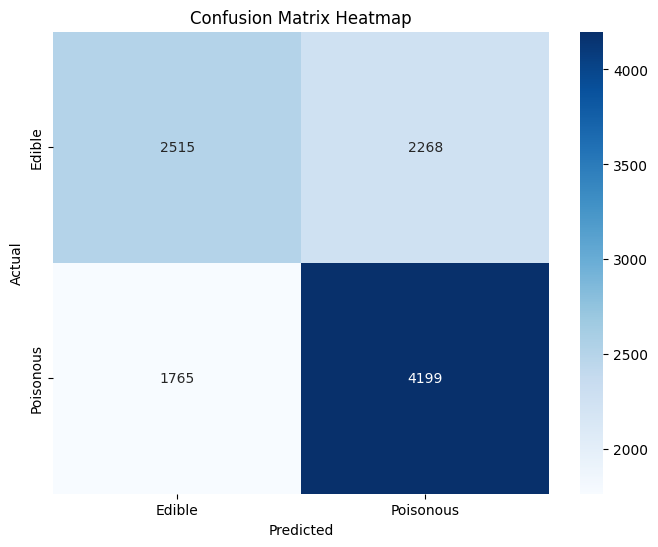

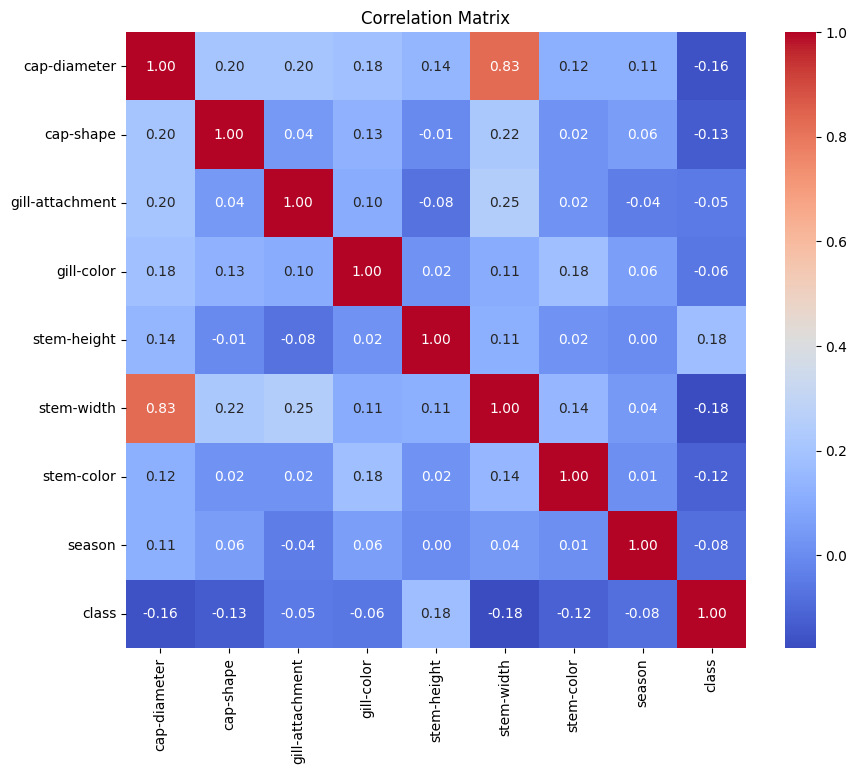

In [4]:
model1=LogisticRegression()
X=data.drop('class',axis=1)
y=data['class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model1.fit(X_train,y_train)
y_pred1=model1.predict(X_test)
print(f'Accuracy score:{accuracy_score(y_test,y_pred1)}')
print(f'Classification_report:{classification_report(y_test,y_pred1)}')
print(f'Confusion_matrix:{confusion_matrix(y_test,y_pred1)}')
print(f'Correlation matrix:{data.corr()}')
# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Accuracy score:0.6385968177165721
Classification_report:              precision    recall  f1-score   support

           0       0.60      0.58      0.59      4783
           1       0.67      0.69      0.68      5964

    accuracy                           0.64     10747
   macro avg       0.63      0.63      0.63     10747
weighted avg       0.64      0.64      0.64     10747

Confusion_matrix:[[2768 2015]
 [1869 4095]]
Correlation matrix:                 cap-diameter  cap-shape  gill-attachment  gill-color  \
cap-diameter         1.000000   0.202713         0.201199    0.183694   
cap-shape            0.202713   1.000000         0.043001    0.129980   
gill-attachment      0.201199   0.043001         1.000000    0.104881   
gill-color           0.183694   0.129980         0.104881    1.000000   
stem-height          0.144586  -0.005523        -0.075565    0.024556   
stem-width           0.828750   0.220292         0.246361    0.105096   
stem-color           0.115885   0.024224   

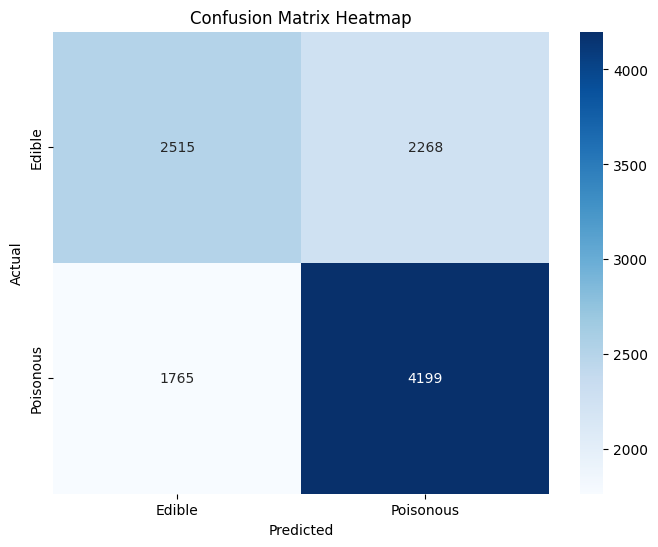

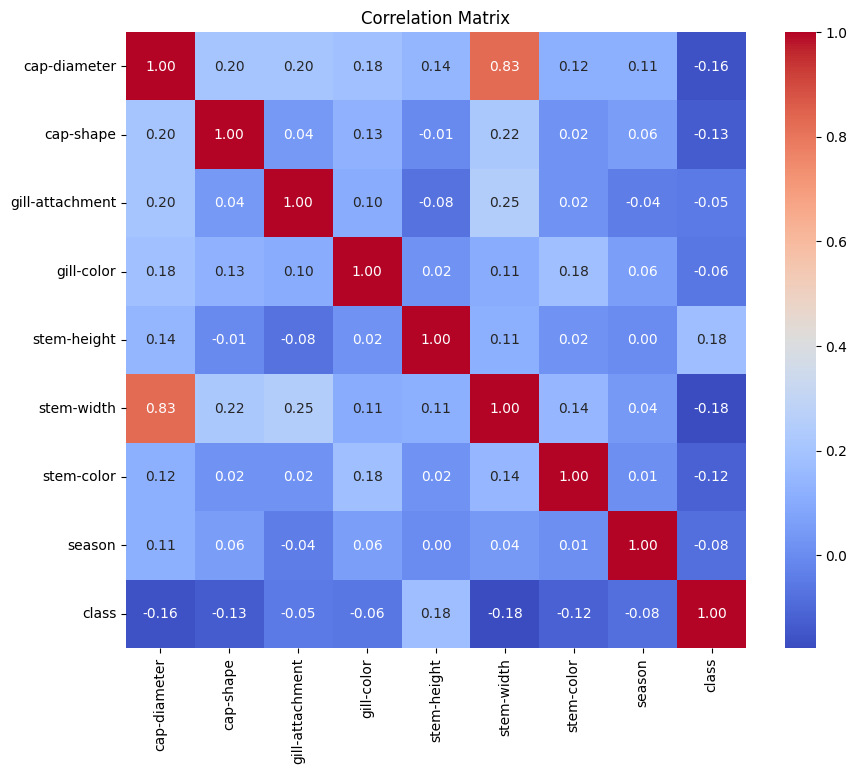

In [5]:
model2=SVC()
X=data.drop('class',axis=1)
y=data['class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)
print(f'Accuracy score:{accuracy_score(y_test,y_pred2)}')
print(f'Classification_report:{classification_report(y_test,y_pred2)}')
print(f'Confusion_matrix:{confusion_matrix(y_test,y_pred2)}')
print(f'Correlation matrix:{data.corr()}')
# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Accuracy score:0.977761235693682
Classification_report:              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4783
           1       0.98      0.98      0.98      5964

    accuracy                           0.98     10747
   macro avg       0.98      0.98      0.98     10747
weighted avg       0.98      0.98      0.98     10747

Confusion_matrix:[[4666  117]
 [ 122 5842]]
Correlation matrix:                 cap-diameter  cap-shape  gill-attachment  gill-color  \
cap-diameter         1.000000   0.202713         0.201199    0.183694   
cap-shape            0.202713   1.000000         0.043001    0.129980   
gill-attachment      0.201199   0.043001         1.000000    0.104881   
gill-color           0.183694   0.129980         0.104881    1.000000   
stem-height          0.144586  -0.005523        -0.075565    0.024556   
stem-width           0.828750   0.220292         0.246361    0.105096   
stem-color           0.115885   0.024224    

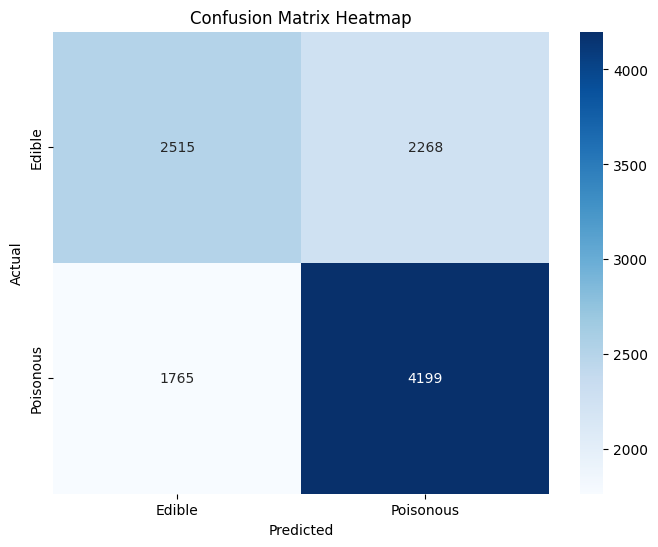

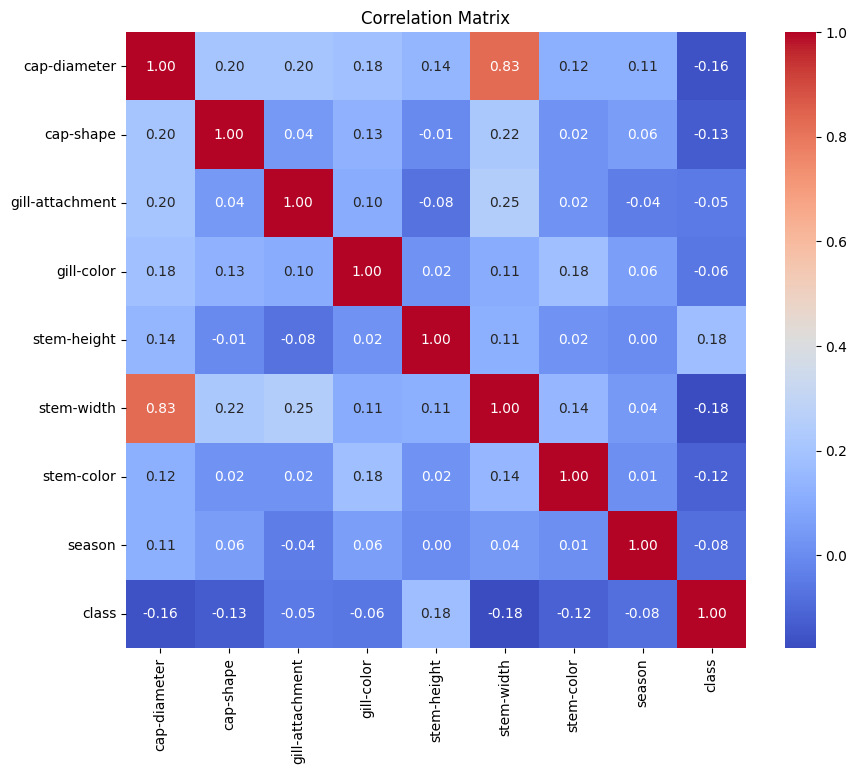

In [6]:
model3=DecisionTreeClassifier()
X=data.drop('class',axis=1)
y=data['class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model3.fit(X_train,y_train)
y_pred3=model3.predict(X_test)
print(f'Accuracy score:{accuracy_score(y_test,y_pred3)}')
print(f'Classification_report:{classification_report(y_test,y_pred3)}')
print(f'Confusion_matrix:{confusion_matrix(y_test,y_pred3)}')
print(f'Correlation matrix:{data.corr()}')
# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Accuracy score:0.9899506839117893
Classification_report:              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4904
           1       0.99      0.99      0.99      5843

    accuracy                           0.99     10747
   macro avg       0.99      0.99      0.99     10747
weighted avg       0.99      0.99      0.99     10747

Confusion_matrix:[[4854   50]
 [  58 5785]]
Correlation matrix:                 cap-diameter  cap-shape  gill-attachment  gill-color  \
cap-diameter         1.000000   0.202713         0.201199    0.183694   
cap-shape            0.202713   1.000000         0.043001    0.129980   
gill-attachment      0.201199   0.043001         1.000000    0.104881   
gill-color           0.183694   0.129980         0.104881    1.000000   
stem-height          0.144586  -0.005523        -0.075565    0.024556   
stem-width           0.828750   0.220292         0.246361    0.105096   
stem-color           0.115885   0.024224   

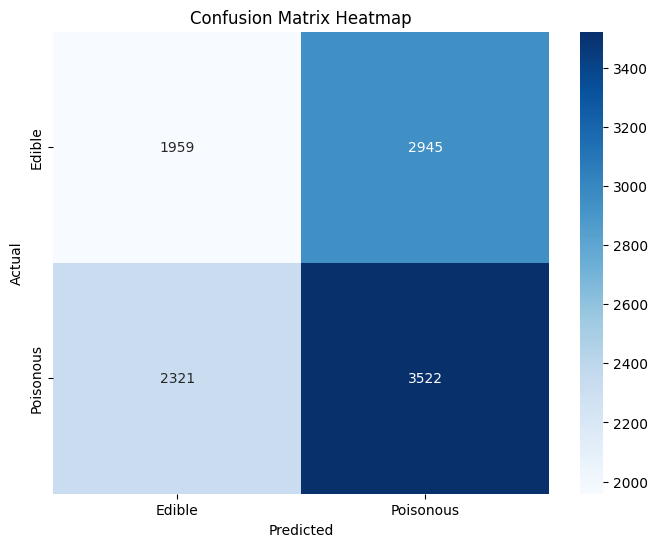

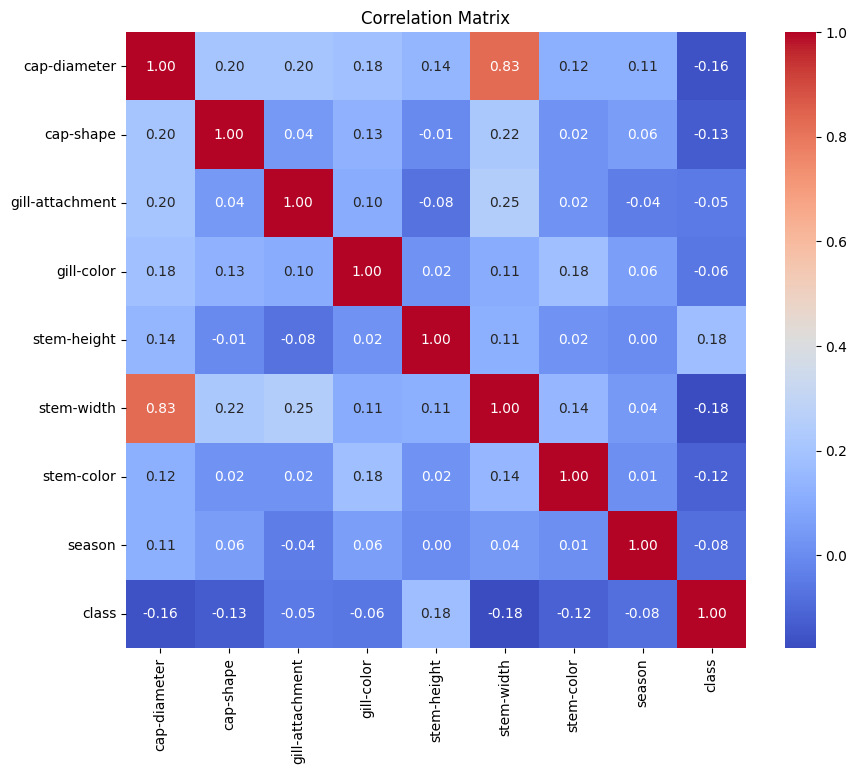

In [11]:
model4 = RandomForestClassifier()
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(f'Accuracy score:{accuracy_score(y_test, y_pred4)}')
print(f'Classification_report:{classification_report(y_test, y_pred4)}')
print(f'Confusion_matrix:{confusion_matrix(y_test, y_pred4)}')
print(f'Correlation matrix:{data.corr()}')
# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

<ipython-input-9-af419ef756c7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=plot_data, palette='Set1')


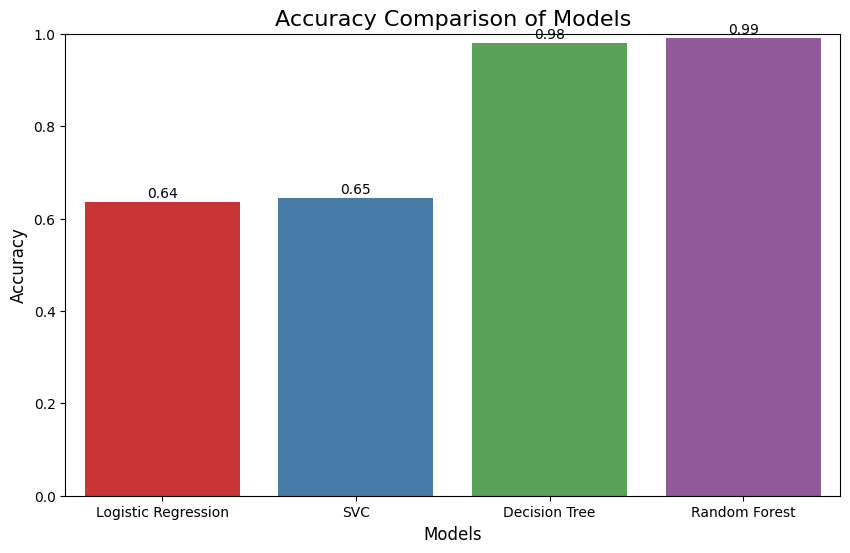

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
model_names = ['Logistic Regression', 'SVC', 'Decision Tree', 'Random Forest']
accuracies = [0.6357916165448321,0.6454150087905987,0.9789025631535117,0.9908392708429722]
plot_data = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=plot_data, palette='Set1')
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy Comparison of Models', fontsize=16)
plt.ylim(0, 1)
for index, row in plot_data.iterrows():
    plt.text(index, row['Accuracy'] + 0.01, f"{row['Accuracy']:.2f}", ha='center', fontsize=10)
plt.show()
